JSearch


We use Job Search API provided by rapidapi.com to scrape features and create dataset and perform operations on that dataset

In [1]:
import requests
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import time
import nltk
import matplotlib.pyplot as plt
import contractions
import regex as re

In [2]:
url = "https://jsearch.p.rapidapi.com/search"

headers = {
    "X-RapidAPI-Key": "9217f66e37mshe7b07846aca3f86p1e4416jsn161e2b1123e2",
    "X-RapidAPI-Host": "jsearch.p.rapidapi.com"
}

query_params = {
    "query": "Artificial Intelligence engineer",
    "country": "IN",
    "page": "1",
    "num_pages": "20"
}

In [3]:
def scrape_article_ids(base_url, headers, query_params, max_pages):
    job_id = []
    job_title = []
    employer_name = []
    job_city = []
    job_country = []
    job_type = []
    job_description = []
    job_posted_at_datetime_utc = []

    for page in tqdm(range(1, max_pages + 1)):
        query_params["page"] = str(page)

        while True:
            try:
                response = requests.get(base_url, headers=headers, params=query_params)
                if response.status_code == 200:
                    jobs = response.json().get("data", [])
                    for job in jobs:
                        job_id.append(job.get("job_id"))
                        job_title.append(job.get("job_title"))
                        employer_name.append(job.get("employer_name"))
                        job_city.append(job.get("job_city"))
                        job_country.append(job.get("job_country"))
                        job_type.append(job.get("job_employment_type"))
                        job_description.append(job.get("job_description"))

                        raw_dt = job.get("job_posted_at_datetime_utc")
                        if raw_dt:
                            try:
                                parsed_dt = datetime.strptime(raw_dt, "%Y-%m-%dT%H:%M:%S.%fZ")
                                formatted_dt = parsed_dt.strftime("%d-%m-%Y %H:%M")
                            except:
                                formatted_dt = ""
                        else:
                            formatted_dt = ""
                        job_posted_at_datetime_utc.append(formatted_dt)

                        
                    break  # break retry loop on success
                elif response.status_code == 429:
                    print(f"Rate limit hit on page {page}. Retrying after 5 seconds...")
                    time.sleep(5)
                else:
                    print(f"Page {page} failed: {response.status_code}")
                    break
            except Exception as e:
                print(f"Error on page {page}: {e}")
                break

        time.sleep(1.5)  # basic throttling

    return job_id, job_title, employer_name, job_city, job_country, job_type, job_description, job_posted_at_datetime_utc


In [4]:
max_pages = 5

job_id, job_title, employer_name, job_city, job_country, job_type, job_description, job_posted_at_datetime_utc, = scrape_article_ids(url, headers, query_params, max_pages)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [05:00<00:00, 60.05s/it]


In [5]:

df = pd.DataFrame({
    "job_id": job_id,
    "job_title": job_title,
    "employer_name": employer_name,
    "job_city": job_city,
    "job_country": job_country,
    "job_type": job_type,
    "job_description": job_description,
    "job_posted_at_datetime_utc": job_posted_at_datetime_utc
})

In [6]:
df

,job_id,job_title,employer_name,job_city,job_country,job_type,job_description,job_posted_at_datetime_utc
0,MS3wbxvV-lJ1uJB7AAAAAA==,GCP Vertex AI Engineer,LTIMindtree,Pune,IN,Full–time,Job description:\n\nRole: GCP Vertex AI Engine...,03-08-2025 11:00
1,VJE0-p-tD31ehaMqAAAAAA==,AI Engineer – LLaMA 3 Agent Integration (ERP +...,4th Quarter Technologies Pvt. Ltd.,Noida,IN,Full–time,We are looking for a skilled and hands-on AI E...,01-08-2025 00:00
2,6ZXX8OkH7PRGB5l_AAAAAA==,Gen AI Engineer,immerso.ai,Chennai,IN,Full–time,Job Description:\n\nWe are hiring a Generative...,01-08-2025 00:00
3,I0YCFGruVgTjOfAQAAAAAA==,Gen AI Engineer,Ixceed,None,IN,Full–time,Role: Gen AI Engineer\n\nLocation: Bangalore\n...,01-08-2025 00:00
4,Hiv-aOz9D3p3Jz9dAAAAAA==,Artificial Intelligence/Machine Learning Engineer,Neolytix,None,IN,Full–time,"As an MLOps Engineer at Neolytix, you will pla...",31-07-2025 00:00
...,...,...,...,...,...,...,...,...
840,xpXeNN0dyeZDcuQFAAAAAA==,AI/ML Developer,Ubique Systems,Bengaluru,IN,Full–time,Greetings from Ubique Systems!!\n\nHiring: AI/...,21-07-2025 00:00
841,9TdbTnaUeZp7KDXmAAAAAA==,Principle Engineer in Artificial Intelligence,Cotocus,Bengaluru,IN,Full–time,General Requirement\n• Preferably Masters in C...,
842,E-oDS1fBHXOlXEonAAAAAA==,AI Engineer | Generative AI Developer – LLM In...,"Trilyon, Inc.",None,IN,Full–time,🚀 We're Hiring: AI Engineer | Generative AI De...,30-07-2025 00:00
843,N_kZDRFWrk1l0lNBAAAAAA==,AI Developer/Lead Position,AES Technologies India Pvt Limited,Coimbatore,IN,Full–time,AI Developer/Lead Position\n\nOverview\n\nLead...,19-07-2025 00:00


In [7]:
df.to_csv('jsearch_ai_jobs.csv', index=False)

**Preprocessing**

In [8]:
dataset = pd.read_csv('jsearch_ai_jobs.csv')

In [9]:
dataset['job_type'] = dataset['job_type'].str.replace(r"[–-]", "", regex=True)
dataset.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

dataset_cleaned = dataset.dropna()

dataset_cleaned.to_csv('jsearch_ai_jobs_cleaned.csv', index=False)
dataset_cleaned = dataset_cleaned.reset_index(drop=True)

print(f"Original number of rows: {len(dataset)}")
print(f"Number of rows after dropping empty cells: {len(dataset_cleaned)}")


Original number of rows: 845
Number of rows after dropping empty cells: 370


In [10]:
dataset_cleaned.to_csv('jsearch_ai_jobs_cleaned.csv')

In [11]:
dataset_cleaned

,job_id,job_title,employer_name,job_city,job_country,job_type,job_description,job_posted_at_datetime_utc
0,MS3wbxvV-lJ1uJB7AAAAAA==,GCP Vertex AI Engineer,LTIMindtree,Pune,IN,Fulltime,Job description:\n\nRole: GCP Vertex AI Engine...,03-08-2025 11:00
1,VJE0-p-tD31ehaMqAAAAAA==,AI Engineer – LLaMA 3 Agent Integration (ERP +...,4th Quarter Technologies Pvt. Ltd.,Noida,IN,Fulltime,We are looking for a skilled and hands-on AI E...,01-08-2025 00:00
2,6ZXX8OkH7PRGB5l_AAAAAA==,Gen AI Engineer,immerso.ai,Chennai,IN,Fulltime,Job Description:\n\nWe are hiring a Generative...,01-08-2025 00:00
3,jtjTDXMJ0xjpesYMAAAAAA==,AI Engineer,GE HEALTHCARE,Bengaluru,IN,Fulltime,Job Description Summary\nWe are seeking a high...,08-07-2025 00:00
4,u5m3655fcuIxzgcnAAAAAA==,AI Application Engineer,Avaya,Pune,IN,Fulltime,About Avaya\n\nAvaya is an enterprise software...,07-07-2025 00:00
...,...,...,...,...,...,...,...,...
365,zgDlmdJquDwAu1xbAAAAAA==,AI-Engineer-Chennai,The Banyan HR Consults Chennai,Chennai,IN,Fulltime,"Job Title: AI Engineer\n\nLocation: Chennai, I...",18-07-2025 00:00
366,T_MyPrWsd4_DQSySAAAAAA==,Applied AI Engineer – Fresher (IIT/NIT Graduat...,Meril,Vapi,IN,Fulltime,Job Title: Applied AI Engineer – Fresher (IIT/...,07-07-2025 00:00
367,xpXeNN0dyeZDcuQFAAAAAA==,AI/ML Developer,Ubique Systems,Bengaluru,IN,Fulltime,Greetings from Ubique Systems!!\n\nHiring: AI/...,21-07-2025 00:00
368,N_kZDRFWrk1l0lNBAAAAAA==,AI Developer/Lead Position,AES Technologies India Pvt Limited,Coimbatore,IN,Fulltime,AI Developer/Lead Position\n\nOverview\n\nLead...,19-07-2025 00:00


**EDA**

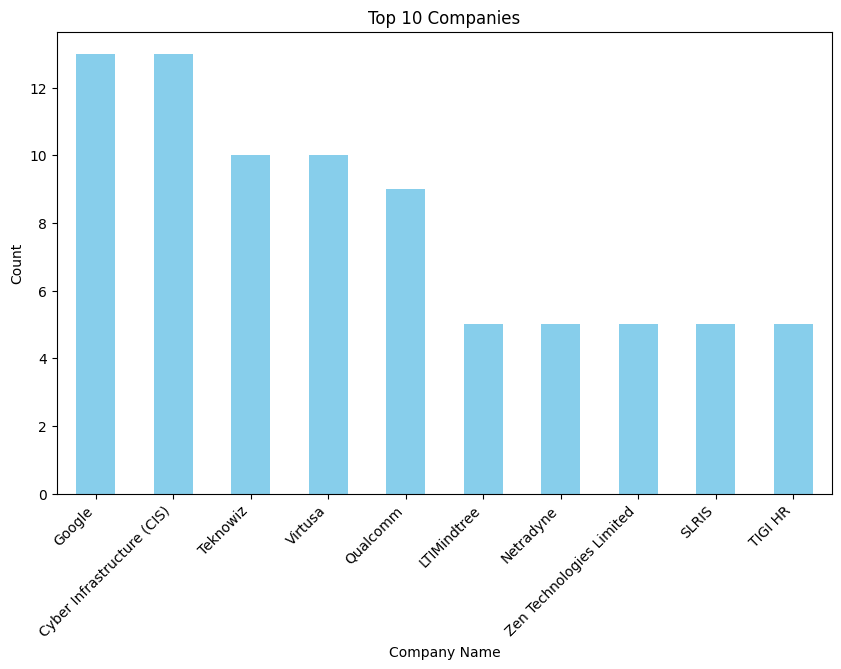

In [12]:
top_companies = dataset_cleaned['employer_name'].value_counts()[:10]

plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar', color='skyblue')
plt.title('Top 10 Companies')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

<Axes: xlabel='Job Description length', ylabel='No. of jobs'>

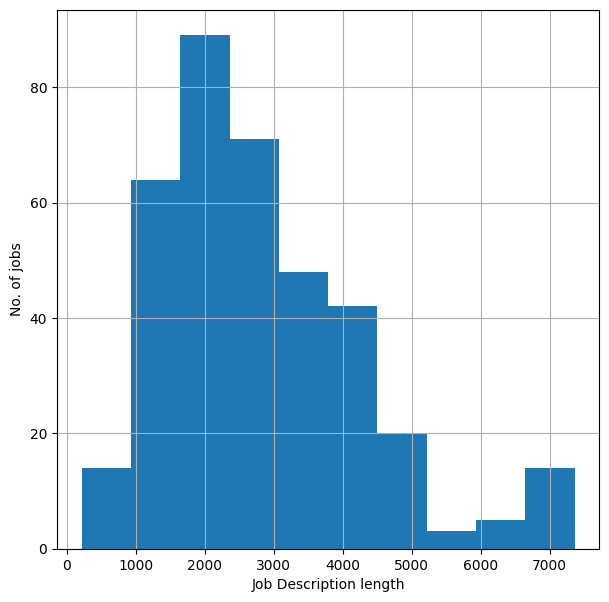

In [13]:
plt.figure(figsize=(7,7))
plt.xlabel("Job Description length")
plt.ylabel("No. of jobs")

dataset_cleaned['job_description'].str.len().hist()

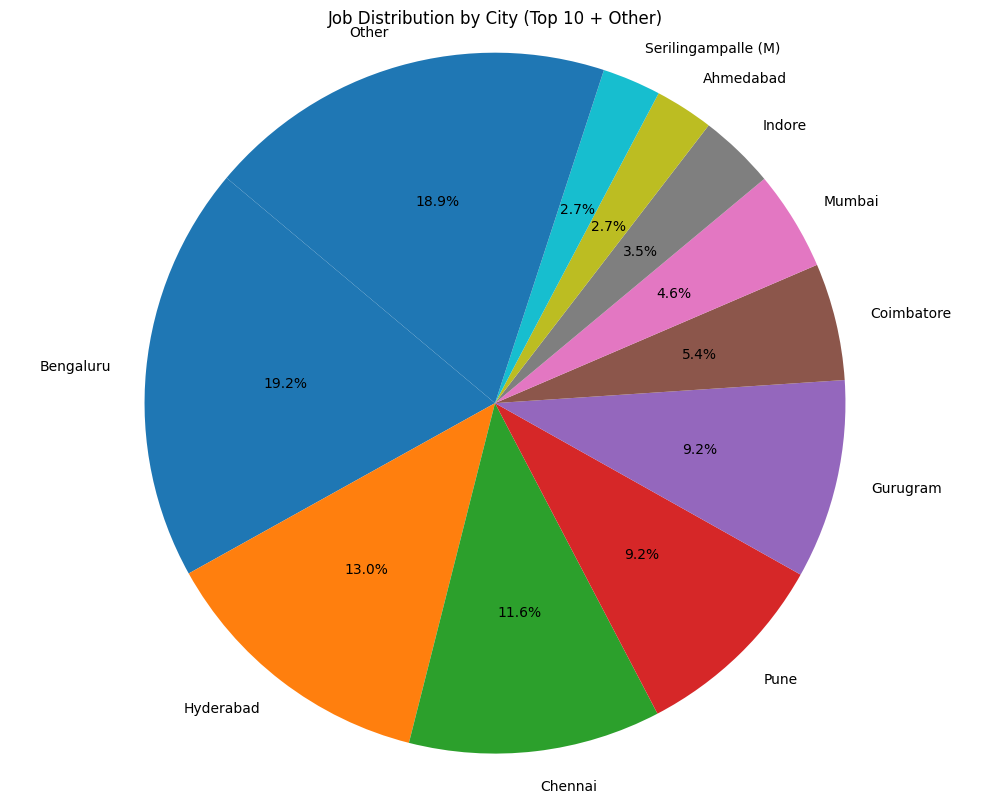

In [14]:
city_counts = dataset_cleaned['job_city'].value_counts()

top_cities = city_counts.head(10)
other_count = city_counts[10:].sum()
top_cities['Other'] = other_count

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Distribution by City (Top 10 + Other)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()
plt.show()
    

In [15]:
import nltk
nltk.download('punkt')      # Sentence and word tokenizer
nltk.download('stopwords')  # English stopwords

[nltk_data] Downloading package punkt to C:\Users\Tejaswi
[nltk_data]     Purushothama/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Tejaswi
[nltk_data]     Purushothama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package stopwords to C:\Users\Tejaswi
[nltk_data]     Purushothama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Tejaswi Purushothama\AppData\Local\Temp\ipykernel_24124\1689259009.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette=sns.color_palette('husl', len(words)))


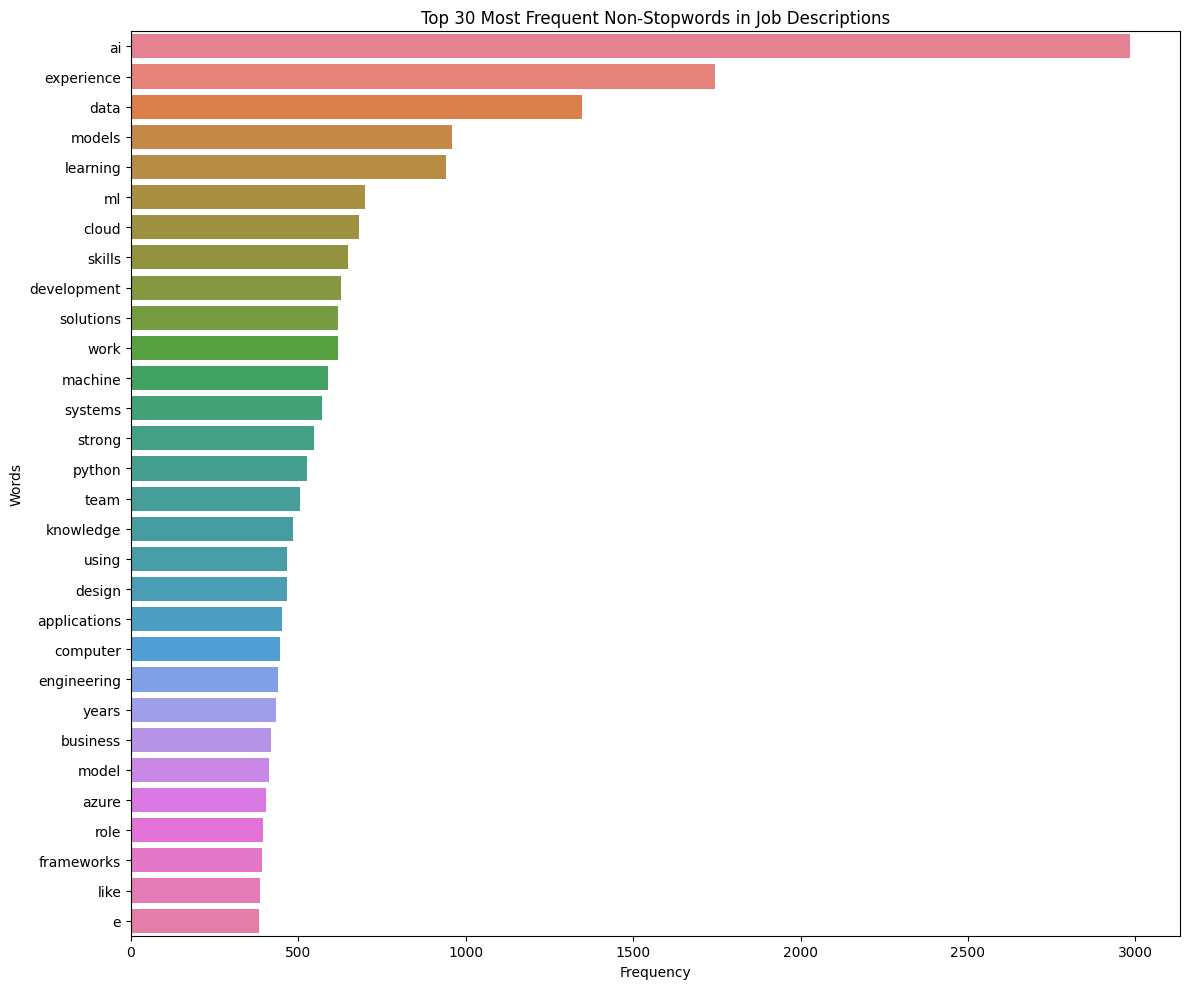

In [16]:
import re
import nltk
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords

nltk.download('stopwords')

dataset_cleaned = dataset_cleaned[dataset_cleaned['job_description'].notnull()].copy()
dataset_cleaned['job_description_clean'] = dataset_cleaned['job_description'].str.lower()
dataset_cleaned['job_description_tokens'] = dataset_cleaned['job_description_clean'].apply(lambda x: re.findall(r'\b\w+\b', x))

stop_words = set(stopwords.words('english'))
dataset_cleaned['job_description_nostop'] = dataset_cleaned['job_description_tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
dataset_cleaned['tokenized_desc_join'] = dataset_cleaned['job_description_nostop'].apply(lambda x: ' '.join(x))

all_words = [word for desc in dataset_cleaned['job_description_nostop'] for word in desc]
word_freq = Counter(all_words).most_common(30)
words, counts = zip(*word_freq)

plt.figure(figsize=(12, 10))
sns.barplot(x=list(counts), y=list(words), palette=sns.color_palette('husl', len(words)))
plt.title('Top 30 Most Frequent Non-Stopwords in Job Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()
plt.show()


**Bi-gram**

In [17]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\Tejaswi Purushothama\AppData\Local\Temp\ipykernel_24124\3825684603.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, palette=['#1f77b4', '#ff7f0e'] * (top_k // 2 + 1))
C:\Users\Tejaswi Purushothama\AppData\Local\Temp\ipykernel_24124\3825684603.py:13: UserWarning: The palette list has more values (22) than needed (20), which may not be intended.
  sns.barplot(x=y, y=x, palette=['#1f77b4', '#ff7f0e'] * (top_k // 2 + 1))


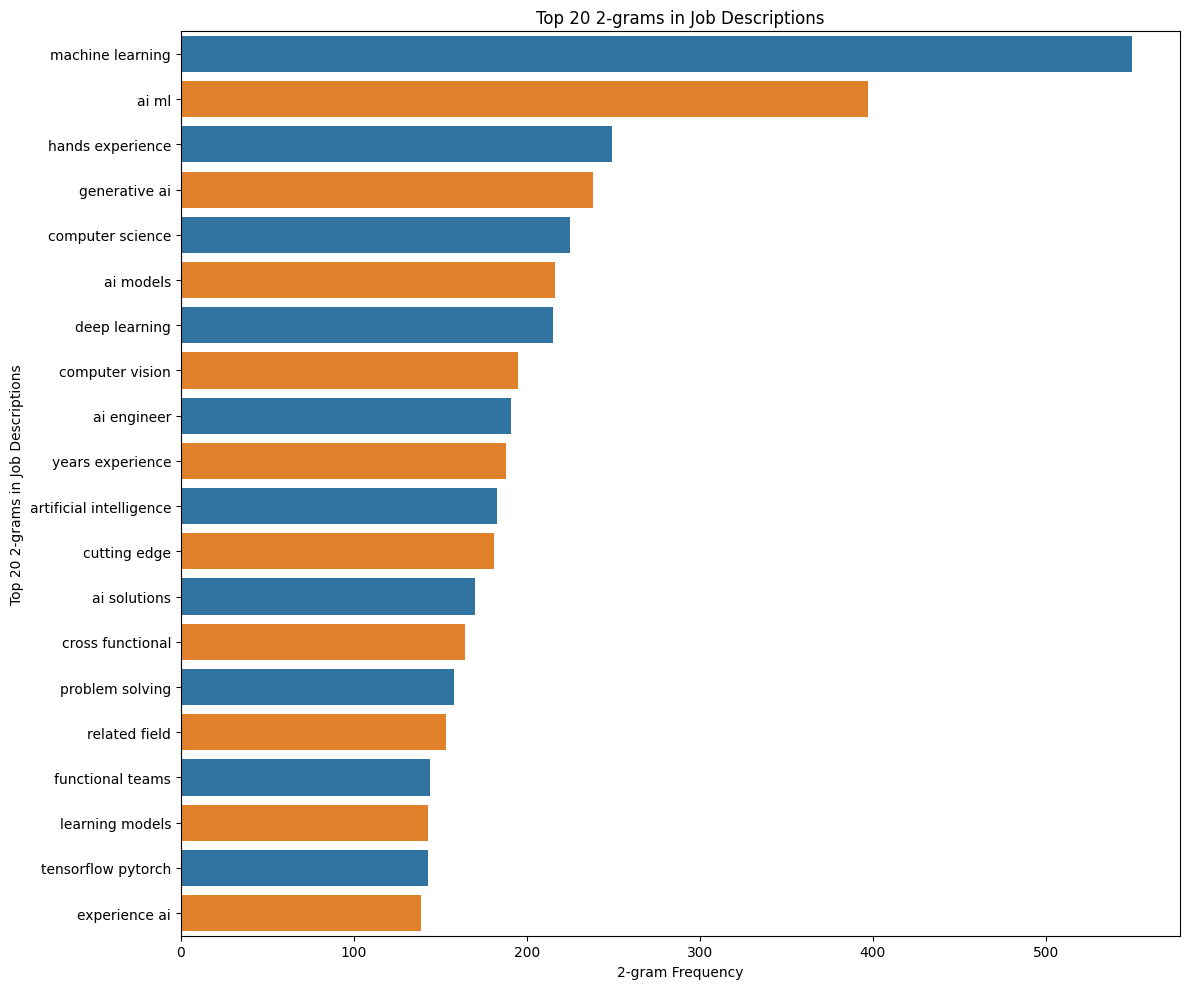

In [18]:
def plot_top_ngrams_barchart(text_series, n=2, top_k=20):
    def _get_top_ngrams(corpus, n):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        return sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_k]

    top_ngrams = _get_top_ngrams(text_series, n)
    x, y = map(list, zip(*top_ngrams))

    plt.figure(figsize=(12, 10))
    sns.barplot(x=y, y=x, palette=['#1f77b4', '#ff7f0e'] * (top_k // 2 + 1))
    plt.xlabel(f'{n}-gram Frequency')
    plt.ylabel(f'Top {top_k} {n}-grams in Job Descriptions')
    plt.title(f'Top {top_k} {n}-grams in Job Descriptions')
    plt.tight_layout()
    plt.show()

plot_top_ngrams_barchart(dataset_cleaned['tokenized_desc_join'], n=2)

**Tri-Gram**

C:\Users\Tejaswi Purushothama\AppData\Local\Temp\ipykernel_24124\3130448593.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, palette=['#1f77b4', '#ff7f0e', '#2ca02c'] * (top_k // 3 + 1))
C:\Users\Tejaswi Purushothama\AppData\Local\Temp\ipykernel_24124\3130448593.py:13: UserWarning: The palette list has more values (21) than needed (20), which may not be intended.
  sns.barplot(x=y, y=x, palette=['#1f77b4', '#ff7f0e', '#2ca02c'] * (top_k // 3 + 1))


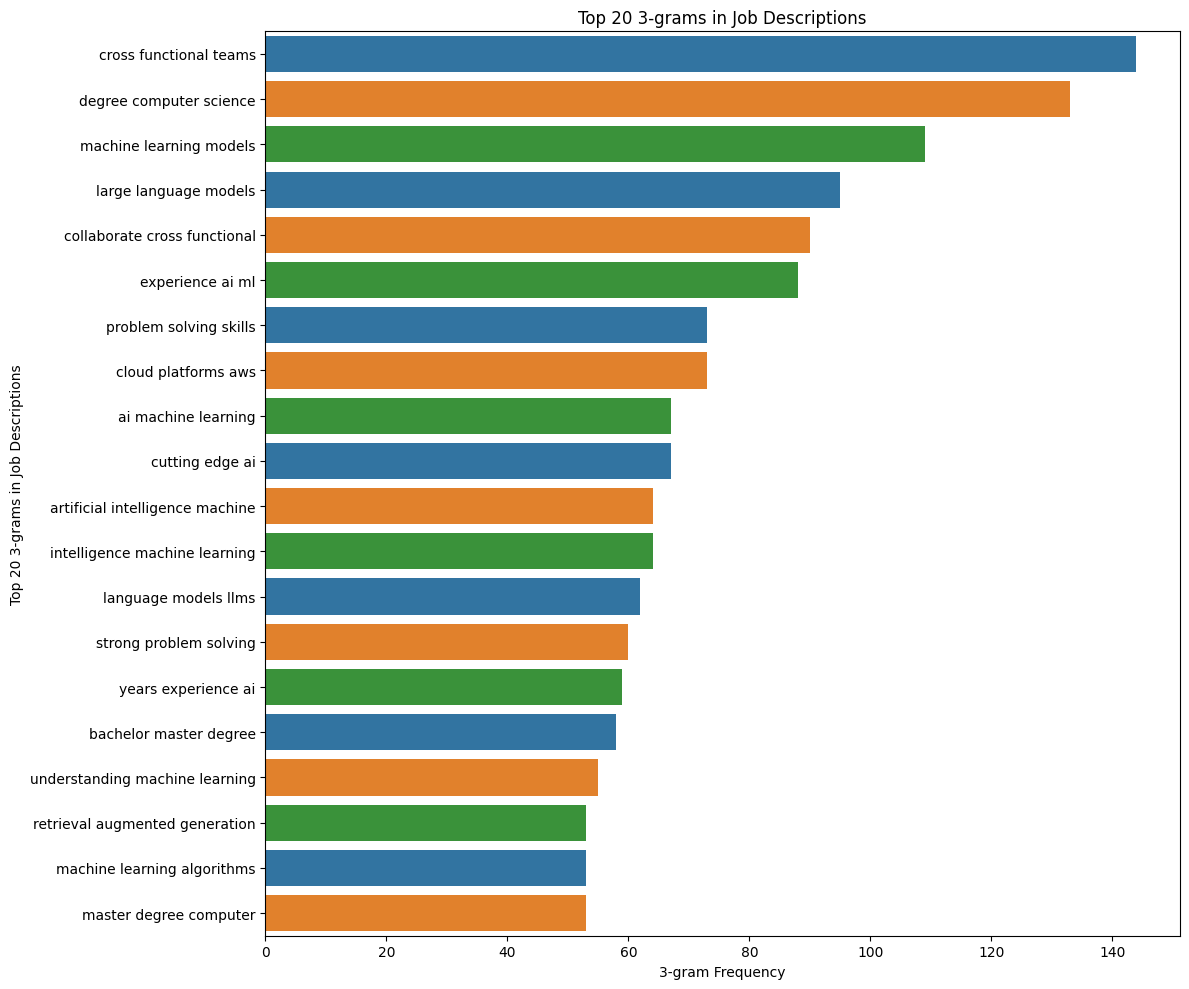

In [19]:
def plot_top_ngrams_barchart(text_series, n=3, top_k=20):
    def _get_top_ngrams(corpus, n):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        return sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_k]

    top_ngrams = _get_top_ngrams(text_series, n)
    x, y = map(list, zip(*top_ngrams))

    plt.figure(figsize=(12, 10))
    sns.barplot(x=y, y=x, palette=['#1f77b4', '#ff7f0e', '#2ca02c'] * (top_k // 3 + 1))
    plt.xlabel(f'{n}-gram Frequency')
    plt.ylabel(f'Top {top_k} {n}-grams in Job Descriptions')
    plt.title(f'Top {top_k} {n}-grams in Job Descriptions')
    plt.tight_layout()
    plt.show()

plot_top_ngrams_barchart(dataset_cleaned['tokenized_desc_join'], n=3)


**Word-Cloud**

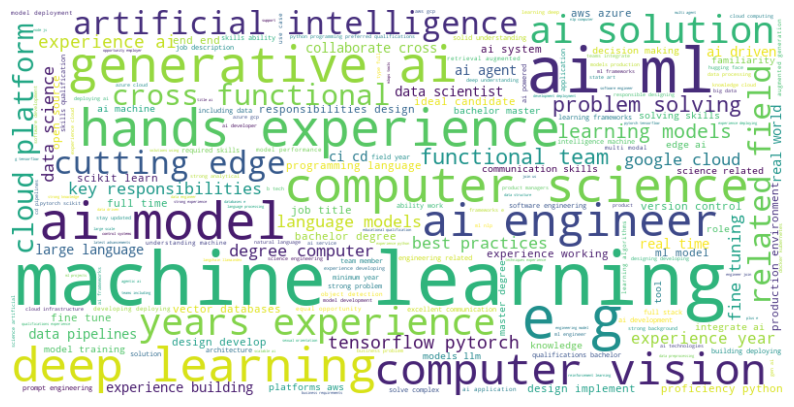

In [20]:
from wordcloud import WordCloud

text_data = ' '.join(dataset_cleaned['tokenized_desc_join'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
dataset_cleaned.drop(columns=['job_description', 'tokenized_desc_join'], inplace=True)

In [23]:
dataset_cleaned

,job_id,job_title,employer_name,job_city,job_country,job_type,job_posted_at_datetime_utc,job_description_clean,job_description_tokens,job_description_nostop
0,MS3wbxvV-lJ1uJB7AAAAAA==,GCP Vertex AI Engineer,LTIMindtree,Pune,IN,Fulltime,03-08-2025 11:00,job description:\n\nrole: gcp vertex ai engine...,"[job, description, role, gcp, vertex, ai, engi...","[job, description, role, gcp, vertex, ai, engi..."
1,VJE0-p-tD31ehaMqAAAAAA==,AI Engineer – LLaMA 3 Agent Integration (ERP +...,4th Quarter Technologies Pvt. Ltd.,Noida,IN,Fulltime,01-08-2025 00:00,we are looking for a skilled and hands-on ai e...,"[we, are, looking, for, a, skilled, and, hands...","[looking, skilled, hands, ai, engineer, design..."
2,6ZXX8OkH7PRGB5l_AAAAAA==,Gen AI Engineer,immerso.ai,Chennai,IN,Fulltime,01-08-2025 00:00,job description:\n\nwe are hiring a generative...,"[job, description, we, are, hiring, a, generat...","[job, description, hiring, generative, ai, eng..."
3,jtjTDXMJ0xjpesYMAAAAAA==,AI Engineer,GE HEALTHCARE,Bengaluru,IN,Fulltime,08-07-2025 00:00,job description summary\nwe are seeking a high...,"[job, description, summary, we, are, seeking, ...","[job, description, summary, seeking, highly, s..."
4,u5m3655fcuIxzgcnAAAAAA==,AI Application Engineer,Avaya,Pune,IN,Fulltime,07-07-2025 00:00,about avaya\n\navaya is an enterprise software...,"[about, avaya, avaya, is, an, enterprise, soft...","[avaya, avaya, enterprise, software, leader, h..."
...,...,...,...,...,...,...,...,...,...,...
365,zgDlmdJquDwAu1xbAAAAAA==,AI-Engineer-Chennai,The Banyan HR Consults Chennai,Chennai,IN,Fulltime,18-07-2025 00:00,"job title: ai engineer\n\nlocation: chennai, i...","[job, title, ai, engineer, location, chennai, ...","[job, title, ai, engineer, location, chennai, ..."
366,T_MyPrWsd4_DQSySAAAAAA==,Applied AI Engineer – Fresher (IIT/NIT Graduat...,Meril,Vapi,IN,Fulltime,07-07-2025 00:00,job title: applied ai engineer – fresher (iit/...,"[job, title, applied, ai, engineer, fresher, i...","[job, title, applied, ai, engineer, fresher, i..."
367,xpXeNN0dyeZDcuQFAAAAAA==,AI/ML Developer,Ubique Systems,Bengaluru,IN,Fulltime,21-07-2025 00:00,greetings from ubique systems!!\n\nhiring: ai/...,"[greetings, from, ubique, systems, hiring, ai,...","[greetings, ubique, systems, hiring, ai, ml, d..."
368,N_kZDRFWrk1l0lNBAAAAAA==,AI Developer/Lead Position,AES Technologies India Pvt Limited,Coimbatore,IN,Fulltime,19-07-2025 00:00,ai developer/lead position\n\noverview\n\nlead...,"[ai, developer, lead, position, overview, lead...","[ai, developer, lead, position, overview, lead..."


In [24]:
dataset_cleaned.to_csv('jsearch_ai_jobs_cleaned_and_tokenized.csv')